In [1]:
#import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn import tree
data = pd.read_csv("../DATA/student-por.csv")

data.loc[data["school"]=="GP","school"]=0
data.loc[data["school"]=="MS","school"]=1
data.loc[data["sex"]=="M","sex"]=1
data.loc[data["sex"]=="F","sex"]=0
data.loc[data["address"]=="U","address"]=1
data.loc[data["address"]=="R","address"]=0
data.loc[data["famsize"]=="GT3","famsize"]=1
data.loc[data["famsize"]=="LE3","famsize"]=0
data.loc[data["Pstatus"]=="A","Pstatus"]=0
data.loc[data["Pstatus"]=="T","Pstatus"]=1
data.loc[data["Mjob"]=="teacher","Mjob"]=0
data.loc[data["Mjob"]=="health","Mjob"]=1
data.loc[data["Mjob"]=="services","Mjob"]=2
data.loc[data["Mjob"]=="at_home","Mjob"]=3
data.loc[data["Mjob"]=="other","Mjob"]=4
data.loc[data["Fjob"]=="teacher","Fjob"]=0
data.loc[data["Fjob"]=="health","Fjob"]=1
data.loc[data["Fjob"]=="services","Fjob"]=2
data.loc[data["Fjob"]=="at_home","Fjob"]=3
data.loc[data["Fjob"]=="other","Fjob"]=4
data.loc[data["reason"]=="home","reason"]=0
data.loc[data["reason"]=="reputation","reason"]=1
data.loc[data["reason"]=="course","reason"]=2
data.loc[data["reason"]=="other","reason"]=3
data.loc[data["guardian"]=="mother","guardian"]=0
data.loc[data["guardian"]=="father","guardian"]=1
data.loc[data["guardian"]=="other","guardian"]=2
data.loc[data["schoolsup"]=="yes","schoolsup"]=1
data.loc[data["schoolsup"]=="no","schoolsup"]=0
data.loc[data["famsup"]=="yes","famsup"]=1
data.loc[data["famsup"]=="no","famsup"]=0
data.loc[data["paid"]=="yes","paid"]=1
data.loc[data["paid"]=="no","paid"]=0
data.loc[data["activities"]=="yes","activities"]=1
data.loc[data["activities"]=="no","activities"]=0
data.loc[data["nursery"]=="yes","nursery"]=1
data.loc[data["nursery"]=="no","nursery"]=0
data.loc[data["higher"]=="yes","higher"]=1
data.loc[data["higher"]=="no","higher"]=0
data.loc[data["internet"]=="yes","internet"]=1
data.loc[data["internet"]=="no","internet"]=0
data.loc[data["romantic"]=="yes","romantic"]=1
data.loc[data["romantic"]=="no","romantic"]=0


if 'new' not in data:
    data.insert(33,'new',0)

for i in range(0,len(data)):
    data.loc[data['G3'] <= 7, 'new'] = 0
    data.loc[(data['G3']>7) & (data['G3']<=14) , 'new'] = 1
    data.loc[data['G3'] >14, 'new'] = 2
    

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


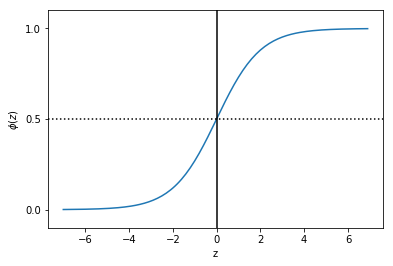

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [3]:
X = data.values[:, 0:29]
Y = data.values[:,33]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

lr=LogisticRegression(C=0.001, random_state=10, tol=0.0001, max_iter=1000)
lr.fit(X_train.astype(int), y_train.astype(int))

#plot_decision_regions(X_train, y_test, clf=lr, res=0.02)
#plt.xlabel('petal width [standardized]')
#plt.ylabel('petal width [standardized]')
#plt.legend(loc='upper left')
#plt.show()
print("Accuracy on training set: {:.3f}".format(lr.score(X_train.astype(int),y_train.astype(int))))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test.astype(int),y_test.astype(int))))

Accuracy on training set: 0.758
Accuracy on test set: 0.738


In [4]:
print(X)

[[0 0 18 ..., 1 1 3]
 [0 0 17 ..., 1 1 3]
 [0 0 15 ..., 2 3 3]
 ..., 
 [1 0 18 ..., 1 1 5]
 [1 1 17 ..., 3 4 2]
 [1 1 18 ..., 3 4 5]]


In [5]:
print(Y)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1
 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 2
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 0 1 1 2
 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 1 1 2 1 1 0 1 1 0 1 0 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2 1 2 1 1 2 1 2 2 2 2 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 2 2 2 1 2 1 1 2 2 1 1 2 2 1 1
 1 1 2 2 2 2 1 2 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 2 0 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [6]:
from sklearn.linear_model import LogisticRegression
X = data.values[:, [29,32]]
y = data.values[:,33]

In [7]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
lr=LogisticRegression(C=0.001, random_state=10, tol=0.0001, max_iter=10)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
        alpha=1.0, linewidth=1, marker='o',
        s=5500, label='test set')

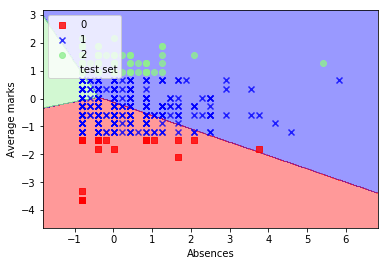

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr.fit(X_train.astype(int), y_train.astype(int))
plot_decision_regions(X_combined_std,y_combined, classifier=lr,test_idx=range(100,210))
plt.xlabel('Absences')
plt.ylabel('Average marks')
plt.legend(loc='upper left')
plt.show()

In [11]:
(X_combined_std).size

1298

In [12]:
(y_combined).size

649

In [13]:
lr.predict_proba(X_test_std[:,:])

array([[ 0.36272212,  0.30973374,  0.32754414],
       [ 0.31227899,  0.34400048,  0.34372053],
       [ 0.29823779,  0.37281345,  0.32894877],
       [ 0.35035227,  0.31411701,  0.33553072],
       [ 0.35035227,  0.31411701,  0.33553072],
       [ 0.33203401,  0.33974475,  0.32822124],
       [ 0.32616534,  0.33876197,  0.3350727 ],
       [ 0.29399467,  0.36437117,  0.34163416],
       [ 0.33563672,  0.32566471,  0.33869857],
       [ 0.33203401,  0.33974475,  0.32822124],
       [ 0.33331532,  0.3584847 ,  0.30819999],
       [ 0.35035227,  0.31411701,  0.33553072],
       [ 0.32616534,  0.33876197,  0.3350727 ],
       [ 0.36114123,  0.31638568,  0.32247309],
       [ 0.28770714,  0.36342286,  0.34887   ],
       [ 0.33563672,  0.32566471,  0.33869857],
       [ 0.32616534,  0.33876197,  0.3350727 ],
       [ 0.32801   ,  0.33164583,  0.34034418],
       [ 0.35035227,  0.31411701,  0.33553072],
       [ 0.35035227,  0.31411701,  0.33553072],
       [ 0.33563672,  0.32566471,  0.338